In [1]:
# Importación de Librerías Principales para el Análisis
# Importante saber que estas son las librerías generales
# Algunas se han colocado en sus celdas específicas por orden 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.patches as mpatches

# Parámetros de configuración para mostrar toda la data 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Limpieza y Preparación

In [2]:
# Lectura Inicial de Dataset 

# Arreglo con los nombres de las columnas que tienen distintos tipos, 
# esto para quitar el warning y reducir probabilidad de cambios innecesarios
columnas_prob = ['approxdate', 'resolution', 'attacktype2_txt', 'attacktype3_txt', 
                 'gsubname2', 'gname3', 'gsubname3', 'claimmode2_txt',
                 'claimmode3_txt', 'weaptype3_txt', 'weapsubtype3_txt', 
                 'weaptype4_txt', 'weapsubtype4_txt', 'divert', 'kidhijcountry', 
                 'ransomnote']
tipos = dict.fromkeys(columnas_prob, str)

# Creación de dataframe inicial en base al csv 
data_inicial = pd.read_csv(r"./terrorism.csv", encoding='latin', dtype=tipos)

In [3]:
# Agarrar solo los registros del 2012 en adelante 
# Esto se hace porque START empezó a recopilar datos formalmente desde esta fecha 
# Incluso se puede verificar que el total de registros de 2012 a 2018 son el 40% 

data_general = data_inicial[data_inicial['iyear'] >= 2012]
print("Proporción sobre total: ", np.round(data_general.shape[0] / data_inicial.shape[0], 3))

# Primera verificación de dimensiones
data_general.shape

Proporción sobre total:  0.423


(76913, 135)

In [4]:
# Primera verificación del tipo de variables por columna  
data_general.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [5]:
# Cantidad de Nulos por columna
data_general.isna().sum().sum()

5520783

In [6]:
# Eliminación de Columnas que son completamente nulas
# Además verifiqué cuales variables que tienen más del 60% de los datos nulos son importantes y cuales no. 

for i in data_general:
    cantidad = data_general[i].isna().sum()
    proporcion = np.round(cantidad / data_general.shape[0],2)
    if proporcion >= 0.6:
        data_general = data_general.drop(i, 1).copy()
        
# Segunda Verificación de Dimensión del Dataset
data_general.shape

(76913, 60)

In [7]:
# Visualización directa para verificar algunos detalles 
# Se pudo determinar que hay columnas redundantes para 
# las variables categóricas 

data_general.head(1)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
104778,201201010001,2012,1,1,0,153,Pakistan,6,South Asia,Balochistan,Quetta,30.200819,66.994354,1.0,0,Incident occurred on Joint road.,01/01/2012: A grenade was thrown into a shop o...,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,1,Business,2.0,Restaurant/Bar/Café,Unknown,Paan Shop,153.0,Pakistan,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,7.0,Grenade,0.0,0.0,0.0,12.0,0.0,0.0,1,"The targeted shops, as well as several other s...",0.0,"""16 hurt in hand grenade attacks in Quetta, Hu...","""Grenade attack injures five in Quetta,"" Daily...",START Primary Collection,-9,-9,0,-9


In [8]:
# Eliminacion de columnas redundantes, estas columnas son categoricas pero la numeracion se hizo 
# sin one hot encoding, esto no es conveniente. 

redundancia = ['country', 'region', 'specificity', 'attacktype1',
              'targtype1', 'targsubtype1', 'natlty1', 'weaptype1',
              'weapsubtype1', 'dbsource']
data_general.drop(redundancia, 1,  inplace=True)

# Otra vez verificar el shape 
data_general.shape

(76913, 50)

In [9]:
data_general.head(1)

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
104778,201201010001,2012,1,1,0,Pakistan,South Asia,Balochistan,Quetta,30.200819,66.994354,0,Incident occurred on Joint road.,01/01/2012: A grenade was thrown into a shop o...,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Business,Restaurant/Bar/Café,Unknown,Paan Shop,Pakistan,Unknown,0.0,0,-99.0,0.0,0.0,Explosives,Grenade,0.0,0.0,0.0,12.0,0.0,0.0,1,"The targeted shops, as well as several other s...",0.0,"""16 hurt in hand grenade attacks in Quetta, Hu...","""Grenade attack injures five in Quetta,"" Daily...",-9,-9,0,-9


In [10]:
# Eliminar las variables que no se pueden utilizar, ej. descripciones 

data_preliminar = data_general.copy()

eliminar = ['eventid', 'provstate', 'vicinity', 'location',
           'summary', 'city', 'targsubtype1_txt', 'corp1',
           'target1', 'gname', 'weapsubtype1_txt', 'propcomment',
           'scite1', 'scite2']
data_preliminar.drop(eliminar, 1, inplace=True)
data_preliminar.shape

(76913, 36)

In [11]:
# Verificar cantidad de nulos que todavía hay 

print("Cantidad de nulos y su proporcion")

for i in data_preliminar:
    suma = data_preliminar[i].isna().sum()
    print(i, " --> ", suma, " -> ",np.round(suma/data_preliminar.shape[0],3))

Cantidad de nulos y su proporcion
iyear  -->  0  ->  0.0
imonth  -->  0  ->  0.0
iday  -->  0  ->  0.0
extended  -->  0  ->  0.0
country_txt  -->  0  ->  0.0
region_txt  -->  0  ->  0.0
latitude  -->  479  ->  0.006
longitude  -->  479  ->  0.006
crit1  -->  0  ->  0.0
crit2  -->  0  ->  0.0
crit3  -->  0  ->  0.0
doubtterr  -->  1  ->  0.0
multiple  -->  1  ->  0.0
success  -->  0  ->  0.0
suicide  -->  0  ->  0.0
attacktype1_txt  -->  0  ->  0.0
targtype1_txt  -->  0  ->  0.0
natlty1_txt  -->  995  ->  0.013
guncertain1  -->  0  ->  0.0
individual  -->  0  ->  0.0
nperps  -->  0  ->  0.0
nperpcap  -->  1  ->  0.0
claimed  -->  0  ->  0.0
weaptype1_txt  -->  0  ->  0.0
nkill  -->  3779  ->  0.049
nkillus  -->  19  ->  0.0
nkillter  -->  1505  ->  0.02
nwound  -->  6399  ->  0.083
nwoundus  -->  53  ->  0.001
nwoundte  -->  2694  ->  0.035
property  -->  0  ->  0.0
ishostkid  -->  0  ->  0.0
INT_LOG  -->  0  ->  0.0
INT_IDEO  -->  0  ->  0.0
INT_MISC  -->  0  ->  0.0
INT_ANY  -->  0  -

In [12]:
# Imputación de tipo Most Frequent para variables categóricas 
from sklearn.impute import SimpleImputer

categorias = ('doubtterr', 'multiple', 'natlty1_txt')

for i in categorias:
    frecuente = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    frecuente.fit(data_preliminar[[i]])
    SimpleImputer()
    data_preliminar[i] = frecuente.transform(data_preliminar[[i]]).ravel()

In [13]:
# Imputación de promedio a las variables categóricas  

numeric = ['nkill', 'nkillus', 'nkillter', 'nwound',
           'nwoundte', 'nwoundus', 'nperpcap']

values = {i: np.round(data_preliminar[i].mean()) for i in numeric}
data_preliminar.fillna(value=values, inplace=True)

# Los datos nulos de latitude y longitude no se pueden imputar, se eliminaran 
data_preliminar.dropna(inplace=True) 

print("Datos nulos: ", data_preliminar.isna().sum().sum())
data_preliminar.shape

Datos nulos:  0


(76434, 36)

## Exploración y Visualizaciones

In [14]:
# Copiar el dataframe en la nueva variable data 

data = data_preliminar.copy()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76434 entries, 104778 to 181690
Data columns (total 36 columns):
iyear              76434 non-null int64
imonth             76434 non-null int64
iday               76434 non-null int64
extended           76434 non-null int64
country_txt        76434 non-null object
region_txt         76434 non-null object
latitude           76434 non-null float64
longitude          76434 non-null float64
crit1              76434 non-null int64
crit2              76434 non-null int64
crit3              76434 non-null int64
doubtterr          76434 non-null float64
multiple           76434 non-null float64
success            76434 non-null int64
suicide            76434 non-null int64
attacktype1_txt    76434 non-null object
targtype1_txt      76434 non-null object
natlty1_txt        76434 non-null object
guncertain1        76434 non-null float64
individual         76434 non-null int64
nperps             76434 non-null float64
nperpcap           76434 non

In [16]:
# Separación de las variables que son de tipo objeto 

categoricas = data.select_dtypes(include=['object']).copy()
categoricas.head()

,country_txt,region_txt,attacktype1_txt,targtype1_txt,natlty1_txt,weaptype1_txt
104778,Pakistan,South Asia,Bombing/Explosion,Business,Pakistan,Explosives
104779,Kenya,Sub-Saharan Africa,Armed Assault,Business,Kenya,Explosives
104780,Pakistan,South Asia,Bombing/Explosion,Military,Pakistan,Explosives
104781,Kenya,Sub-Saharan Africa,Armed Assault,Business,Kenya,Explosives
104782,Pakistan,South Asia,Hostage Taking (Kidnapping),Private Citizens & Property,Pakistan,Firearms


In [18]:
# Funcion de Exploración de Cantidad 

def cantidad(df,columna):
    qt = df[columna].value_counts()
    print("Total de ", columna,": ", qt.count())
    print(qt)

In [18]:
# Exploracion de paises 
cantidad(categoricas, 'country_txt')

# Se puede verificar que un porcentaje relativamente bajo del 
# total de 145 paises tiene más de 1000 ataques terroristas

Total de  country_txt :  145
Iraq                                16735
Afghanistan                          9632
Pakistan                             8825
India                                5035
Philippines                          3538
Nigeria                              3322
Somalia                              3166
Yemen                                2850
Libya                                2205
Syria                                1972
Egypt                                1959
Thailand                             1954
Ukraine                              1661
Turkey                               1454
Bangladesh                            881
Colombia                              838
West Bank and Gaza Strip              704
Sudan                                 678
United Kingdom                        636
Democratic Republic of the Congo      607
Israel                                528
Kenya                                 502
Nepal                                 491
Mali 

In [19]:
# Exploracion de tipos de ataque
cantidad(categoricas, 'attacktype1_txt')

Total de  attacktype1_txt :  9
Bombing/Explosion                      40176
Armed Assault                          17505
Hostage Taking (Kidnapping)             5471
Assassination                           4777
Unknown                                 3813
Facility/Infrastructure Attack          3782
Unarmed Assault                          389
Hostage Taking (Barricade Incident)      314
Hijacking                                207
Name: attacktype1_txt, dtype: int64


## Qué región geográfica ha sido afectada por mayor cantidad de ataques terroristas?

In [19]:
# Cantidad de Ataques por región 
cantidad(categoricas, 'region_txt')

Total de  region_txt :  12
Middle East & North Africa     29597
South Asia                     24969
Sub-Saharan Africa             10414
Southeast Asia                  6013
Eastern Europe                  2220
Western Europe                  1565
South America                   1075
North America                    342
East Asia                        105
Central Asia                      61
Australasia & Oceania             46
Central America & Caribbean       27
Name: region_txt, dtype: int64


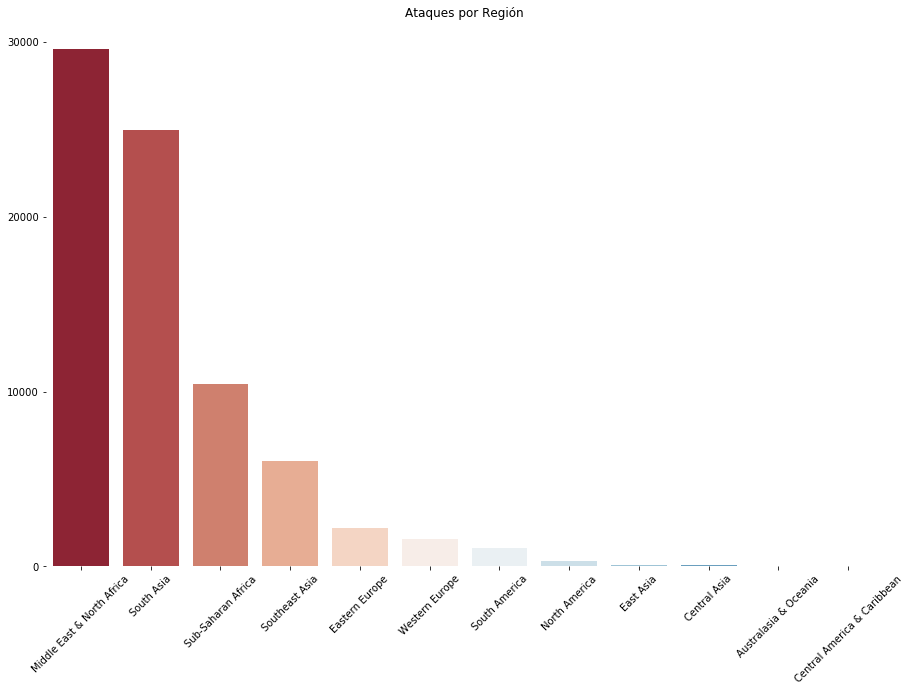

In [20]:
# Visualización de ataques terroristas por región 
tipo = 'region_txt'

fig, ax = plt.subplots(figsize=(15,10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ch = sns.countplot(x=tipo, 
                   data=categoricas,
                   order = categoricas[tipo].value_counts().index, 
                  palette='RdBu')
ch.set_title("Ataques por Región")
ch.set_xticklabels(ch.get_xticklabels(), rotation=45)
ax.get_yaxis().set_ticks([0,10000,20000,30000])
ch.set_ylabel('')
ch.set_xlabel('')
plt.savefig('./img1.png', bbox_inches='tight')
plt.show()

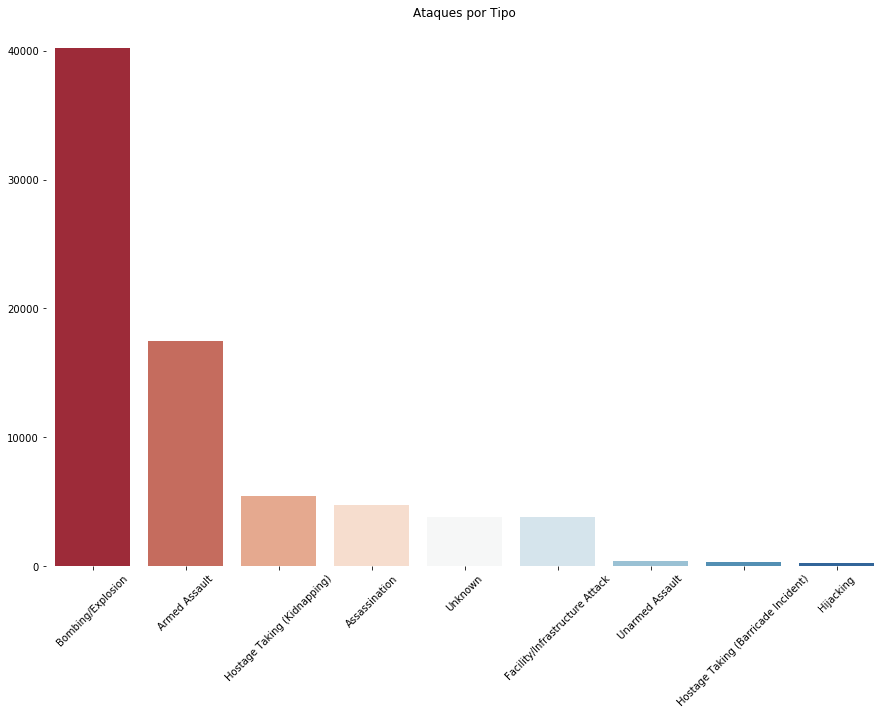

In [21]:
# Visualización de ataques terroristas por tipo de ataque 
tipo = 'attacktype1_txt'

fig, ax = plt.subplots(figsize=(15,10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ch = sns.countplot(x=tipo, 
                   data=categoricas,
                   order = categoricas[tipo].value_counts().index, 
                  palette='RdBu')
ch.set_title("Ataques por Tipo")
ch.set_xticklabels(ch.get_xticklabels(), rotation=45)
ax.get_yaxis().set_ticks([0,10000,20000,30000,40000])
ch.set_ylabel('')
ch.set_xlabel('')

plt.savefig('./img2.png', bbox_inches='tight')
plt.show()

In [22]:
variable1 = 'country_txt'
variable2 = 'success'

paises = categoricas[variable1].value_counts().to_frame()
paises['name'] = paises.index
paises = paises[paises[variable1] > 1000]

#para ataques es un poco mas complicado 
ataques = data[variable2].value_counts().to_frame()
ataques['name'] = ataques.index
test = pd.DataFrame(columns=['ataque', 'cantidad'])

for i in paises['name']:
    for j in ataques['name']:
        temporal = categoricas[(categoricas[variable1] == i) & (data[variable2] == j)][variable1]
        numero = temporal.value_counts().sum()
        test = test.append(pd.DataFrame({
            'ataque': j,
            'cantidad': numero, 
        }, index=[0]))

n1 = len(paises[variable1].unique())
n2 = len(ataques[variable2].unique())

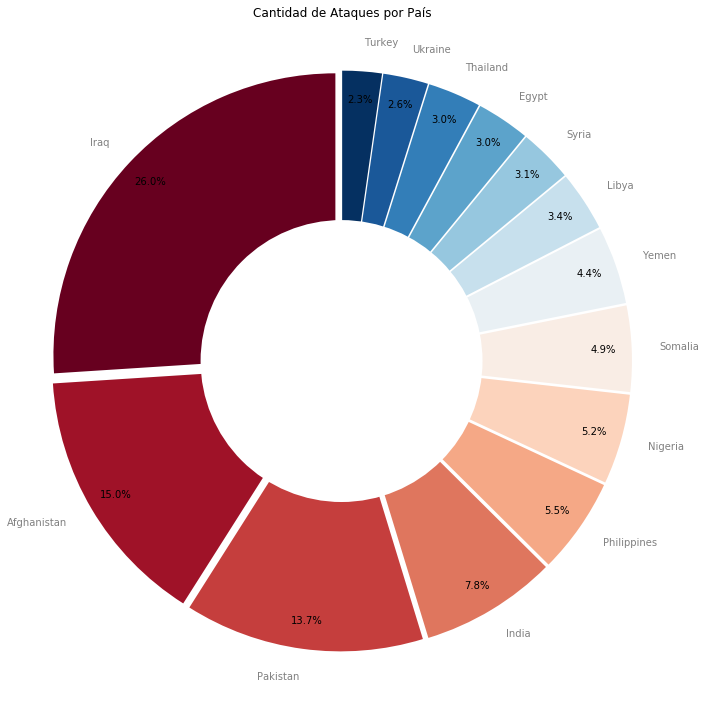

In [23]:
cmap = plt.get_cmap('RdBu')
cmap2 = plt.get_cmap('tab10')

colors = [cmap(i) for i in np.linspace(0, 1, n1)]
colors2 = [cmap2(i) for i in np.linspace(0, 1, n2)]
colorsm = colors2 * 9
explode = [0.03 for i in range(paises.shape[0])]

identif = [mpatches.Patch(color=colors2[i], label=ataques['name'][i]) for i in range(len(colors2))]

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax1.pie(paises[variable1], labels=paises['name'], autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors, pctdistance=0.90, explode = explode, frame=True)
#patches2, texts2, autotexts2 = ax1.pie(test['cantidad'], autopct='%1.1f%%',
        #shadow=False, startangle=90, colors=colorsm, pctdistance=0.5, radius=0.8)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_yaxis().set_ticks([])
ax1.get_xaxis().set_ticks([])

for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')
    
#for autotext2 in autotexts2:
    #autotext2.set_color('white')
    
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
    
#plt.legend(handles=identif)
ax1.axis('equal')  
plt.tight_layout()
plt.title("Cantidad de Ataques por País")
plt.savefig('./img3.png', bbox_inches='tight')
plt.show()

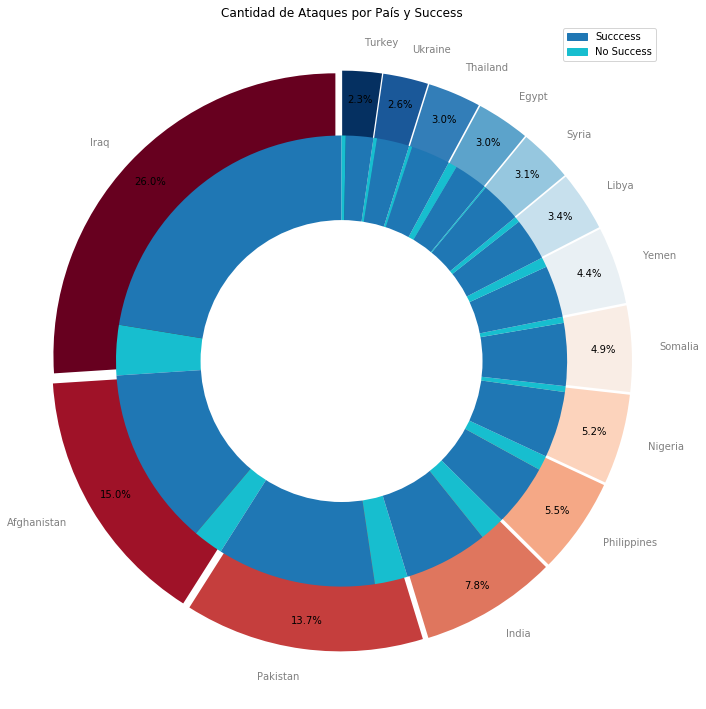

In [24]:
cmap = plt.get_cmap('RdBu')
cmap2 = plt.get_cmap('tab10')

colors = [cmap(i) for i in np.linspace(0, 1, n1)]
colors2 = [cmap2(i) for i in np.linspace(0, 1, n2)]
colorsm = colors2 * 9
explode = [0.03 for i in range(paises.shape[0])]

labels = ['Succcess', 'No Success']
identif = [mpatches.Patch(color=colors2[i], label=labels[i]) for i in range(len(colors2))]

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax1.pie(paises[variable1], labels=paises['name'], autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors, pctdistance=0.90, explode = explode, frame=True)
patches2, texts2, autotexts2 = ax1.pie(test['cantidad'], autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colorsm, pctdistance=0.5, radius=0.8)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_yaxis().set_ticks([])

for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')
    
for autotext2 in autotexts2:
    autotext2.set_color('white')
    
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
    
plt.legend(handles=identif)
ax1.axis('equal')  
plt.tight_layout()
plt.title("Cantidad de Ataques por País y Success")
plt.savefig('./img4.png', bbox_inches='tight')
plt.show()

## Hay alguna relación entre el país y el tipo de ataque?

[]

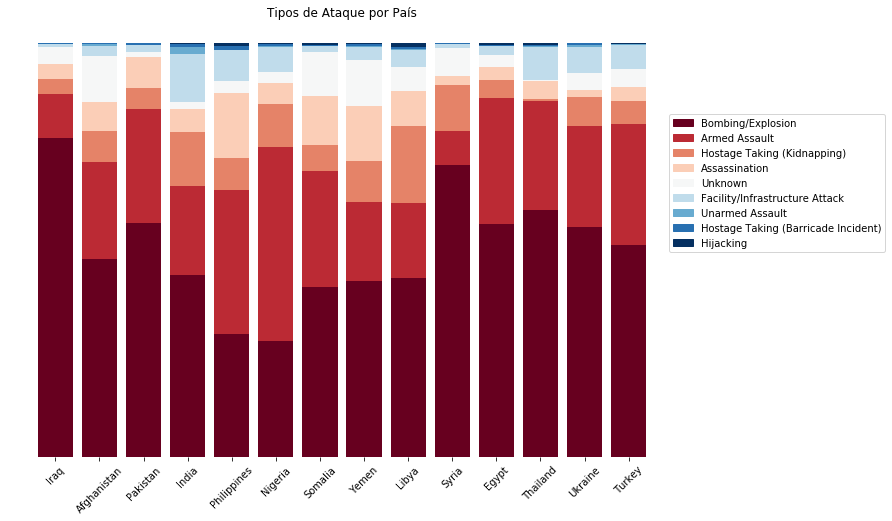

In [25]:
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

paises = categoricas['country_txt'].value_counts().to_frame()
paises['name'] = paises.index
paises = paises[paises['country_txt'] > 1000]

attacks = categoricas['attacktype1_txt'].value_counts().to_frame()
attacks['name'] = attacks.index

master = []

testing = pd.DataFrame(columns=['name', 'cantidad'])

for j in range(attacks.shape[0]):
    testing = pd.DataFrame(columns=['name', 'cantidad'])
    cont = 0
    for i in paises['name']:
        prop = paises['country_txt'][cont]
        cont += 1
        temporal = data[(data.country_txt == i) & (data.attacktype1_txt == attacks['name'][j])]['attacktype1_txt']
        testing = testing.append(pd.DataFrame({
            'name': attacks['name'][j] ,
            'cantidad': np.round(temporal.value_counts().sum() / prop,10)
        }, index=[attacks['name'][j] + i]))
    master.append(testing)
    

countries = [i for i in paises['name']]
info = {
    'countries':countries
}

columnas = ['countries']
for i in attacks['name']:
    columnas.append(i)


for i in range(len(attacks['name'])):
    info[attacks['name'][i]] = [j for j in master[i]['cantidad']]
    
dataf = pd.DataFrame(info, columns=columnas)

bar_1 = np.arange(14)
f, ax1 = plt.subplots(1, figsize=(12,8))
ax1.bar(dataf['countries'], dataf['Bombing/Explosion'], color=colors[0])
ax1.bar(dataf['countries'], dataf['Armed Assault'], bottom=dataf['Bombing/Explosion'], color=colors[1])
ax1.bar(dataf['countries'], dataf['Hostage Taking (Kidnapping)'], bottom =[i + j for i,j in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'])], color=colors[2])
ax1.bar(dataf['countries'], dataf['Assassination'], bottom =[i + j + k for i,j,k in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'])], color=colors[3])
ax1.bar(dataf['countries'], dataf['Unknown'], bottom =[i + j + k + l for i,j,k,l in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'], dataf['Assassination'])], color=colors[4])
ax1.bar(dataf['countries'], dataf['Facility/Infrastructure Attack'], bottom =[i + j + k + l + m for i,j,k,l,m in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'], dataf['Assassination'], dataf['Unknown'])], color=colors[5])
ax1.bar(dataf['countries'], dataf['Unarmed Assault'], bottom =[i + j + k + l + m + n for i,j,k,l,m,n in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'], dataf['Assassination'], dataf['Unknown'], dataf['Facility/Infrastructure Attack'])], color=colors[6])
ax1.bar(dataf['countries'], dataf['Hostage Taking (Barricade Incident)'], bottom =[i + j + k + l + m + n + o for i,j,k,l,m,n,o in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'], dataf['Assassination'], dataf['Unknown'], dataf['Facility/Infrastructure Attack'], dataf['Unarmed Assault'])], color=colors[7])
ax1.bar(dataf['countries'], dataf['Hijacking'], bottom =[i + j + k + l + m + n + o + p for i,j,k,l,m,n,o,p in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'], dataf['Assassination'], dataf['Unknown'], dataf['Facility/Infrastructure Attack'], dataf['Unarmed Assault'], dataf['Hostage Taking (Barricade Incident)'])], color=colors[8])

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_yaxis().set_ticks([])
plt.xticks(rotation=45)

info = [mpatches.Patch(color=colors[i], label=attacks['name'][i]) for i in range(len(colors))]
plt.legend(handles=info,loc='upper center', bbox_to_anchor=(1.15, 0.8))
plt.title("Tipos de Ataque por País")
plt.savefig('./img5.png', bbox_inches='tight')
plt.plot()

## Visualización en Mapas

In [26]:
def mapear2(cajausar, limitantes, mapita, titulo):
    caja = (np.min(data['longitude']), np.max(data['longitude']),
            np.min(data['latitude']), np.max(data['latitude']))
    np.round(caja, 6)





    utilizar = data[(data['longitude'] >= limitantes[0]) & (data['longitude'] <= limitantes[1]) & (data['latitude'] >= limitantes[2]) & (data['latitude'] <= limitantes[3])]
    colores_d = utilizar.copy()
    colores_d["colors"] = np.nan

    from matplotlib import cm
    from matplotlib.colors import ListedColormap, LinearSegmentedColormap

    viridis = cm.get_cmap('Set1', 9)
    intermedio = np.linspace(0,1,9)
    colores_mapa = viridis(intermedio)

    for i in range(9):
        nop = cm.colors.to_hex(viridis(intermedio[i]))
        colores_d.loc[colores_d.attacktype1_txt == attacks['name'][i], 'colors'] = str(nop) 

    fig, ax = plt.subplots(figsize = (15,15))
    ax.scatter(utilizar['longitude'], utilizar['latitude'], zorder=1, alpha= 0.2, c=colores_d.colors, s=15)
    ax.set_xlim(cajausar[0],cajausar[1])
    ax.set_ylim(cajausar[2],cajausar[3])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])

    ax.imshow(mapita, zorder=0, extent = cajausar, aspect='equal')

    info = [mpatches.Patch(color=colores_mapa[i], label=attacks['name'][i]) for i in range(len(colores_mapa))]
    plt.legend(handles=info)
    plt.title(titulo)
    plt.savefig('./img6.png', bbox_inches='tight')
    plt.show()

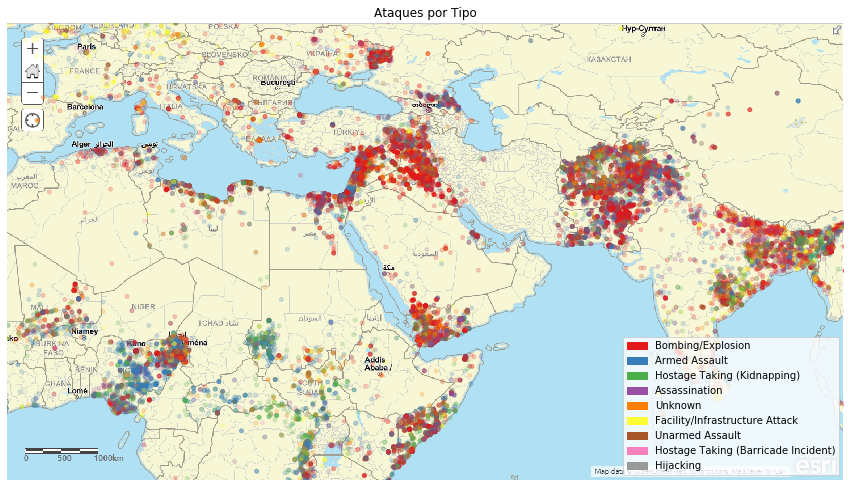

In [27]:
cajausar = (-7.4,95.9,-3.9, 52.5)
limitantes = (-67,175,-35,59)
mapita = plt.imread('./lado4.png')
titulo = "Ataques por Tipo"
mapear2(cajausar, limitantes, mapita, titulo)

Text(0, 0.5, 'Frequency de Ataques')

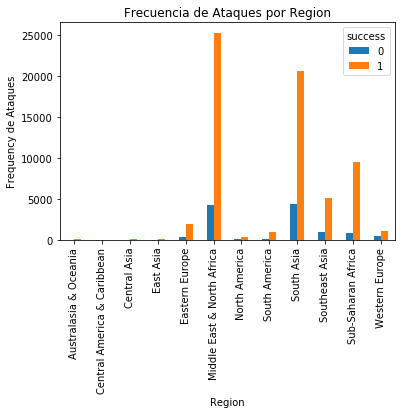

In [28]:
# ver que variables me pueden servir para predecir el success 
pd.crosstab(data.region_txt,data.success).plot(kind='bar')
plt.title('Frecuencia de Ataques por Region')
plt.xlabel('Region')
plt.ylabel('Frequency de Ataques')

Text(0, 0.5, 'Frequency de Ataques')

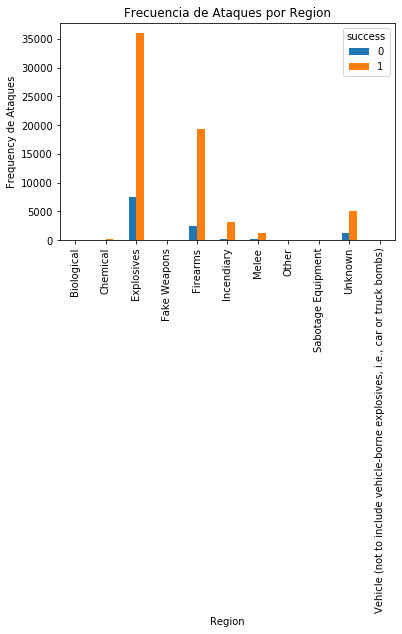

In [29]:
pd.crosstab(data.weaptype1_txt,data.success).plot(kind='bar')
plt.title('Frecuencia de Ataques por Region')
plt.xlabel('Region')
plt.ylabel('Frequency de Ataques')

## Predicción de Variable Attacktype 1

In [35]:
# primero hay que definir si hay alguna categoria nominal 
# Todas las variables categóricas son nominales 

data.apply(pd.Series.nunique)

iyear                  6
imonth                12
iday                  31
extended               2
country_txt          145
region_txt            12
latitude           30287
longitude          29971
crit1                  2
crit2                  2
crit3                  2
doubtterr              2
multiple               2
success                2
suicide                2
attacktype1_txt        9
targtype1_txt         22
natlty1_txt          160
guncertain1            2
individual             2
nperps                77
nperpcap              32
claimed                2
weaptype1_txt         11
nkill                156
nkillus               11
nkillter              91
nwound               157
nwoundus              21
nwoundte              42
property               3
ishostkid              3
INT_LOG                3
INT_IDEO               3
INT_MISC               2
INT_ANY                3
dtype: int64

In [36]:
# Utilizar One Hot Encoding para la columna de attacktype1_txt
# En algunos algoritmos no es necesario

type_dummies = pd.get_dummies(data['attacktype1_txt'], prefix='type')

In [37]:
# Esta va a ser la última copia

data_final = data.copy()
#data_final.drop(columns=['attacktype1_txt'], inplace=True)
#data_final = pd.concat([data_final, type_dummies], axis = 1)

In [38]:
# Obtener variables dummies de la region 

region_dummies = pd.get_dummies(data['region_txt'], prefix='region')
data_final.drop(columns=['region_txt'], inplace=True)
data_final = pd.concat([data_final, region_dummies], axis = 1)

In [39]:
import category_encoders as ce

In [40]:
# Probar codificar las variables de mayor cardinalidad por medio del Binary Encoder 

encoder = ce.BinaryEncoder(cols=['country_txt', 'natlty1_txt', 'targtype1_txt'])
binariof = encoder.fit_transform(data_final)
binariof.shape
data_final = binariof.copy()

In [41]:
# Obtener dummy variables de la categoría de arma 

weapon_dummies = pd.get_dummies(data['weaptype1_txt'], prefix='weapon')
data_final.drop(columns=['weaptype1_txt'], inplace=True)
data_final = pd.concat([data_final, weapon_dummies], axis = 1)

In [42]:
data_final.apply(pd.Series.nunique)

iyear                                                                                     6
imonth                                                                                   12
iday                                                                                     31
extended                                                                                  2
country_txt_0                                                                             1
country_txt_1                                                                             2
country_txt_2                                                                             2
country_txt_3                                                                             2
country_txt_4                                                                             2
country_txt_5                                                                             2
country_txt_6                                                                   

In [43]:
# Verifiación de nueva dimensionalidad 
data_final.shape

(76434, 78)

In [44]:
# Quitar variables que no tiene sentido incluir 
data_reduccion = data_final.copy()

no_sentido = ['latitude', 'longitude', 'nperpcap', 'claimed', 
             'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 
             'nwoundte', 'property', 'ishostkid', 'INT_LOG', 'INT_IDEO',
             'INT_MISC', 'INT_ANY']

data_reduccion.drop(no_sentido, 1, inplace=True)

In [45]:
# Aplicar un scaler min max a las variables de tiempo 

from sklearn.preprocessing import MinMaxScaler
variables = ['iyear', 'imonth', 'iday', 
            'nperps']

values = data_reduccion.loc[:,variables].values
scaler = MinMaxScaler(feature_range=(0,1)).fit(values)
normalized = scaler.transform(values)
reducido = pd.DataFrame(normalized, columns=variables)

In [52]:
data_reduccion.reset_index(drop=True, inplace=True)
reducido.reset_index(drop=True, inplace=True)

data_reduccion.drop(variables, 1, inplace=True)
data_reduccion = pd.concat([data_reduccion, reducido], axis=1)

#ys = ['type_Armed Assault', 'type_Assassination', 'type_Bombing/Explosion',
#     'type_Facility/Infrastructure Attack', 'type_Hijacking', 'type_Hostage Taking (Barricade Incident)',
#     'type_Hostage Taking (Kidnapping)', 'type_Unarmed Assault', 'type_Unknown']

ys = ['attacktype1_txt']
data_final_y = data_reduccion.loc[:,ys].to_numpy().ravel()
data_final_x = data_reduccion.drop(ys, 1).to_numpy()
data_final_x.shape

(76434, 61)

## Encontrar los modelos con cross validation K fold 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import svm

In [54]:
def crosskfold(modelo, x, y, splits):
    resultados = []
    cv = KFold(n_splits=splits, shuffle=False)

    contador = 0
    for traini, testi in cv.split(x):
        print(contador)
        contador += 1

        x_train, x_test, y_train, y_test = x[traini],x[testi],y[traini],y[testi]
        modelo.fit(x_train, y_train)
        resultados.append(modelo.score(x_test, y_test))
    return resultados 

In [55]:
# LOGISTIC REGRESSION

res = crosskfold(LogisticRegression(random_state=42, multi_class='ovr', max_iter=1500),
                data_final_x, data_final_y, 5)
print(res)

0
1
2
3
4
[0.891214757637208, 0.8738797671223916, 0.8672728462091973, 0.8713939948976255, 0.8444982336778751]


In [56]:
# SUPPORT VECTOR MACHINE 

res = crosskfold(svm.SVC(decision_function_shape='ovo'),
                data_final_x, data_final_y, 5)
print(res)

0
1
2
3
4
[0.8934388696277883, 0.8789167266304704, 0.8767580296984365, 0.8855236475436645, 0.859740939421693]


In [57]:
# Aplicar LDA para la reduccion de las dimensiones 

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
x_train, x_test, y_train, y_test = train_test_split(data_final_x, data_final_y, test_size=0.20, random_state=42)

lda = LDA(n_components=3)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [59]:
# LDA para Logistic Regression
res2 = crosskfold(LogisticRegression(random_state=42, multi_class='ovr', max_iter=1500),
                x_train, y_train, 10)
print(res2)

0
1
2
3
4
5
6
7
8
9
[0.8585445625511039, 0.8719542109566639, 0.8654129190515126, 0.8603434178250204, 0.8672117743254293, 0.8642681929681112, 0.8529844644317253, 0.8624468433104351, 0.8593392214589467, 0.8671900556100752]


In [60]:
# LDA para SVM 

clf = svm.SVC(decision_function_shape='ovo')
res3 = crosskfold(clf, x_train, y_train, 5)
print(res3)

0
1
2
3
4
[0.8664758789860998, 0.8636140637775961, 0.866464960340175, 0.8584512225038842, 0.8640935481233134]


In [61]:
# SOLAMENTE LDA

clf = LDA(n_components=3)
res4 = crosskfold(clf, data_final_x, data_final_y, 5)
print(res4)

0
1
2
3
4
[0.8910839275201151, 0.8719827304245438, 0.8655066396284424, 0.8681232419703016, 0.8384796545858956]
